## imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from  dl.nn.nn import NeuralNetwork as network
from  dl.nn import layers as layers
from  dl.nn import losses as losses
from dl.nn import activations as activations
from utils.metrics import Metrics as metrics
from utils import optimizers as optimizers

## XNOR Gate (Binary Neural Network)

In [5]:
# training data
x_train = np.array([[0,0], [0,1], [1,0], [1,1]])
y_train = np.array([[0], [1], [1], [0]])


# network
net = network()

net.add(layers.DenseLayer(input_shape=(2,), units=8, use_bias=False))
net.add(layers.ActivationLayer(activations.Tanh))
net.add(layers.DenseLayer(units= 4, activation="tanh"))
net.add(layers.DropoutLayer(0.1))
net.add(layers.BatchNormalization(4))
net.add(layers.DenseLayer(units=1, activation="sigmoid"))                    # input_shape=(1, 10)       ;   output_shape=(1, 10)
# net.add(ActivationLayer(Sigmoid))

# net.use_loss(MSE_loss)
net.compile(loss=losses.BinaryCrossentropy(), optimizer=optimizers.GradientDescent(lr=0.9), initializer="glorot_uniform")


In [6]:
net.summary()

Summary of the Neural Network
___________________________________________________________________________________________________________________
Layer (type)        Neurons #      Input Shape    Output Shape   Weights shape  Bias shape        Param #
Input               2              -              (2, None)      -              -                       0

DenseLayer          8              (2,)           (8,)           (8, 2)         0                      16

ActivationLayer     -              activavtion    Tanh           -              -                       0

DenseLayer          4              (8,)           (4,)           (4, 8)         (4, 1)                 36

DropoutLayer        -              droupout rate: 0.1            -              -                       0

BatchNormalization  -              epsilon:       1e-08          -              -                       -

DenseLayer          1              (4,)           (1,)           (1, 4)         (1, 1)                  5


In [7]:
net.fit(x_train, y_train, epochs=50, verbose=1)

# test
out = net.predict(x_train)
print(out)

Epoch 1-50 ======================> cost: 0.6412
Epoch 11-50 ======================> cost: 0.6367
Epoch 21-50 ======================> cost: 0.2793
Epoch 31-50 ======================> cost: 0.0623
Epoch 41-50 ======================> cost: 0.5870
[[0.01794022]
 [0.96066276]
 [0.98701845]
 [0.02455563]]


In [8]:
xor_pred = np.round(out)

metrics.accuracy(y_train, xor_pred)

1.0

## Breast Cancer (Binary Neural Network)

In [9]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

data_df = pd.DataFrame(data = data.data,
                       columns = data.feature_names)
data_df.shape

(569, 30)

In [10]:
breast_net = network()

breast_net.add(layers.DenseLayer(input_shape=(30,), units=64, activation="tanh"))
# breast_net.add(ActivationLayer(Tanh))

breast_net.add(layers.DenseLayer( units=128, activation="tanh"))
# breast_net.add(ActivationLayer(Tanh))

breast_net.add(layers.DropoutLayer(0.2))

breast_net.add(layers.DenseLayer( units=32, activation="tanh"))                    # input_shape=(1, 10)       ;   output_shape=(1, 10)
# breast_net.add(ActivationLayer(Tanh))

breast_net.add(layers.DenseLayer( units=1, activation="sigmoid"))                    # input_shape=(1, 10)       ;   output_shape=(1, 10)
# breast_net.add(ActivationLayer(Sigmoid))

breast_net.compile(loss=losses.BinaryCrossentropy(), optimizer=optimizers.Adam(lr=0.001), initializer="glorot_uniform")

breast_net.summary()

Summary of the Neural Network
___________________________________________________________________________________________________________________
Layer (type)        Neurons #      Input Shape    Output Shape   Weights shape  Bias shape        Param #
Input               30             -              (30, None)     -              -                       0

DenseLayer          64             (30,)          (64,)          (64, 30)       (64, 1)              1984

DenseLayer          128            (64,)          (128,)         (128, 64)      (128, 1)             8320

DropoutLayer        -              droupout rate: 0.2            -              -                       0

DenseLayer          32             (128,)         (32,)          (32, 128)      (32, 1)              4128

DenseLayer          1              (32,)          (1,)           (1, 32)        (1, 1)                 33

Total params                                                                                        14465


In [11]:
# y_breast = np.array(pd.get_dummies(data.target))
y_breast = data.target
breast_net.fit(x_train=data.data,y_train= y_breast, epochs=10, verbose=2)

Epoch 1-10 ======================> cost: 0.4257
Epoch 2-10 ======================> cost: 0.3367
Epoch 3-10 ======================> cost: 0.2810
Epoch 4-10 ======================> cost: 0.2436
Epoch 5-10 ======================> cost: 0.2271
Epoch 6-10 ======================> cost: 0.2216
Epoch 7-10 ======================> cost: 0.2345
Epoch 8-10 ======================> cost: 0.2161
Epoch 9-10 ======================> cost: 0.2602
Epoch 10-10 ======================> cost: 0.2404


In [12]:
pred_breast = breast_net.predict(data.data)

pred_breast = np.round(pred_breast).reshape(-1)

print("Accuracy: ", metrics.accuracy(y_breast, pred_breast))
print("Precision: ", metrics.precision(y_breast, pred_breast, average="binary"))
print("Recall: ", metrics.recall(y_breast, pred_breast, average="binary"))

Accuracy:  0.9173989455184535
Precision:  0.8914141414141414
Recall:  0.988795518207283


In [13]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics as sk_metrics

print(f"Accuracy: {sk_metrics.accuracy_score(y_breast, pred_breast)}")
print(f"Precision: {sk_metrics.precision_score(y_breast, pred_breast)}")
print(f"Recall: {sk_metrics.recall_score(y_breast, pred_breast)}")


Accuracy: 0.9173989455184535
Precision: 0.8914141414141414
Recall: 0.988795518207283


## Moon (Binary Neural Network)

In [14]:
import sklearn
import sklearn.datasets
X, y = sklearn.datasets.make_moons(500, noise=0.30)

moon_net = network()

moon_net.add(layers.DenseLayer(input_shape=(2,), units= 16, activation="tanh"))

moon_net.add(layers.DenseLayer(units= 8, activation="tanh"))

moon_net.add(layers.DropoutLayer(0.5))

moon_net.add(layers.DenseLayer(units= 1, activation="sigmoid"))                    # input_shape=(1, 10)       ;   output_shape=(1, 10)

moon_net.compile(loss=losses.BinaryCrossentropy(), optimizer=optimizers.Adam(lr=0.001))

moon_net.summary()

Summary of the Neural Network
___________________________________________________________________________________________________________________
Layer (type)        Neurons #      Input Shape    Output Shape   Weights shape  Bias shape        Param #
Input               2              -              (2, None)      -              -                       0

DenseLayer          16             (2,)           (16,)          (16, 2)        (16, 1)                48

DenseLayer          8              (16,)          (8,)           (8, 16)        (8, 1)                136

DropoutLayer        -              droupout rate: 0.5            -              -                       0

DenseLayer          1              (8,)           (1,)           (1, 8)         (1, 1)                  9

Total params                                                                                          193


In [15]:
moon_net.fit(X, y, epochs=300, verbose=1, batch_size=32)

Epoch 1-300 ======================> cost: 0.7607
Epoch 11-300 ======================> cost: 0.4209
Epoch 21-300 ======================> cost: 0.3776
Epoch 31-300 ======================> cost: 0.3661
Epoch 41-300 ======================> cost: 0.3630
Epoch 51-300 ======================> cost: 0.3612
Epoch 61-300 ======================> cost: 0.3602
Epoch 71-300 ======================> cost: 0.3582
Epoch 81-300 ======================> cost: 0.3566
Epoch 91-300 ======================> cost: 0.3546
Epoch 101-300 ======================> cost: 0.3537
Epoch 111-300 ======================> cost: 0.3485
Epoch 121-300 ======================> cost: 0.3417
Epoch 131-300 ======================> cost: 0.3346
Epoch 141-300 ======================> cost: 0.3291
Epoch 151-300 ======================> cost: 0.3142
Epoch 161-300 ======================> cost: 0.3007
Epoch 171-300 ======================> cost: 0.2864
Epoch 181-300 ======================> cost: 0.2723
Epoch 191-300 ======================> cost

In [16]:
moon_pred = moon_net.predict(X)

# as this is also a binary classification, we need to reshape the output to 1D array
moon_pred = np.round(moon_pred).reshape(-1)

print("Accuracy: ", metrics.accuracy(y, moon_pred))
print("Precision: ", metrics.precision(y, moon_pred, average="binary"))
print("Recall: ", metrics.recall(y, moon_pred, average="binary"))
print("R2: ", metrics.r2_score(y, moon_pred))

Accuracy:  0.914
Precision:  0.9190283400809717
Recall:  0.908
R2:  0.656


In [17]:
print("Accuracy: ", sk_metrics.accuracy_score(y, moon_pred))
print("Precision: ", sk_metrics.precision_score(y, moon_pred))
print("Recall: ", sk_metrics.recall_score(y, moon_pred))
print("R2: ", sk_metrics.r2_score(y, moon_pred))

Accuracy:  0.914
Precision:  0.9190283400809717
Recall:  0.908
R2:  0.656


## MNIST Fashion Recognition (10 classes)

In [19]:
# load MNIST Fashion dataset from keras

from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# normalize the data
x_train = x_train/255.
x_test = x_test/255.

# Flatten the images
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

In [20]:
precisions_ = []
accuracies_ = []
recalls_ = []
f1s_ = []
losses_ = []


def callback(true, predicted, loss, epoch):
    losses_.append(loss)
    pred  = metrics.predict_classes(predicted)
    # print(pred.shape)
    global precisions_
    global accuracies_
    global recalls_
    global f1s_
    precisions_.append(metrics.precision(true, pred))
    accuracies_.append(metrics.accuracy(true, pred))
    recalls_.append(metrics.recall(true, pred))
    f1s_.append(metrics.f1_score(true, pred))

In [21]:
digits = network()

digits.add(layers.DenseLayer(input_shape=(28*28,), units=20, activation="relu"))              

digits.add(layers.DenseLayer( units=10, activation="relu"))                

digits.add(layers.DropoutLayer(dropout_rate=0.2))

digits.add(layers.DenseLayer( units= 8, activation="relu"))

digits.add(layers.BatchNormalization(8))

digits.add(layers.DenseLayer( units=10, activation="softmax"))                   

digits.compile(loss=losses.CategoricalCrossentropy(), optimizer=optimizers.Adam(lr=0.001))

digits.summary()

Summary of the Neural Network
___________________________________________________________________________________________________________________
Layer (type)        Neurons #      Input Shape    Output Shape   Weights shape  Bias shape        Param #
Input               784            -              (784, None)    -              -                       0

DenseLayer          20             (784,)         (20,)          (20, 784)      (20, 1)             15700

DenseLayer          10             (20,)          (10,)          (10, 20)       (10, 1)               210

DropoutLayer        -              droupout rate: 0.2            -              -                       0

DenseLayer          8              (10,)          (8,)           (8, 10)        (8, 1)                 88

BatchNormalization  -              epsilon:       1e-08          -              -                       -

DenseLayer          10             (8,)           (10,)          (10, 8)        (10, 1)                90


In [22]:
y_oh = np.array(pd.get_dummies(y_train))
digits.fit(x_train, y_oh, epochs=30,  batch_size=128, verbose=1, callback=callback)

Epoch 1-30 ======================> cost: 0.6706
Epoch 11-30 ======================> cost: 0.3846
Epoch 21-30 ======================> cost: 0.3527


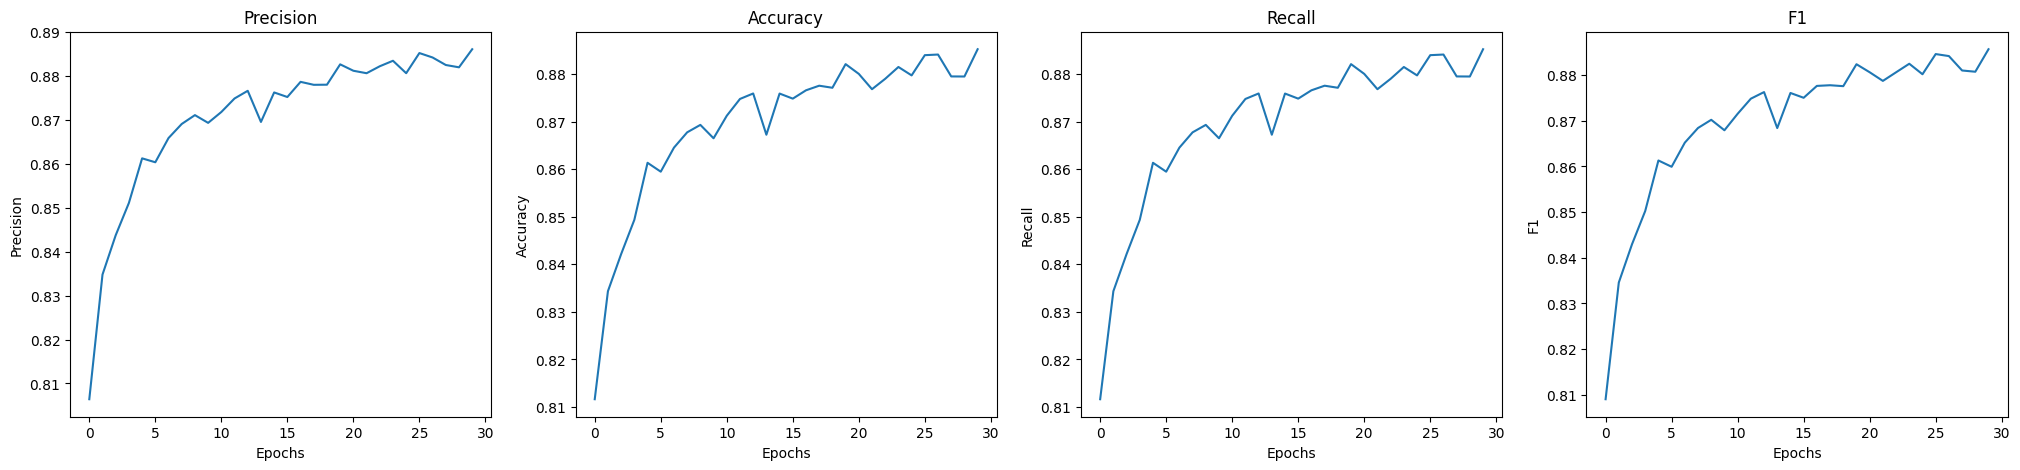

In [23]:
def plot_metrics(metrics, titles):
    # plot all the metrics in one plot

    fig, ax = plt.subplots(1, len(metrics), figsize=(25, 5))
    if len(metrics) == 1:
        ax = [ax]

    for i, metric in enumerate(metrics):
        ax[i].plot(metric)
        ax[i].set_title(titles[i])
        ax[i].set_xlabel("Epochs")
        ax[i].set_ylabel(titles[i])
    plt.show()

plot_metrics([precisions_, accuracies_, recalls_, f1s_], ["Precision", "Accuracy", "Recall", "F1"])

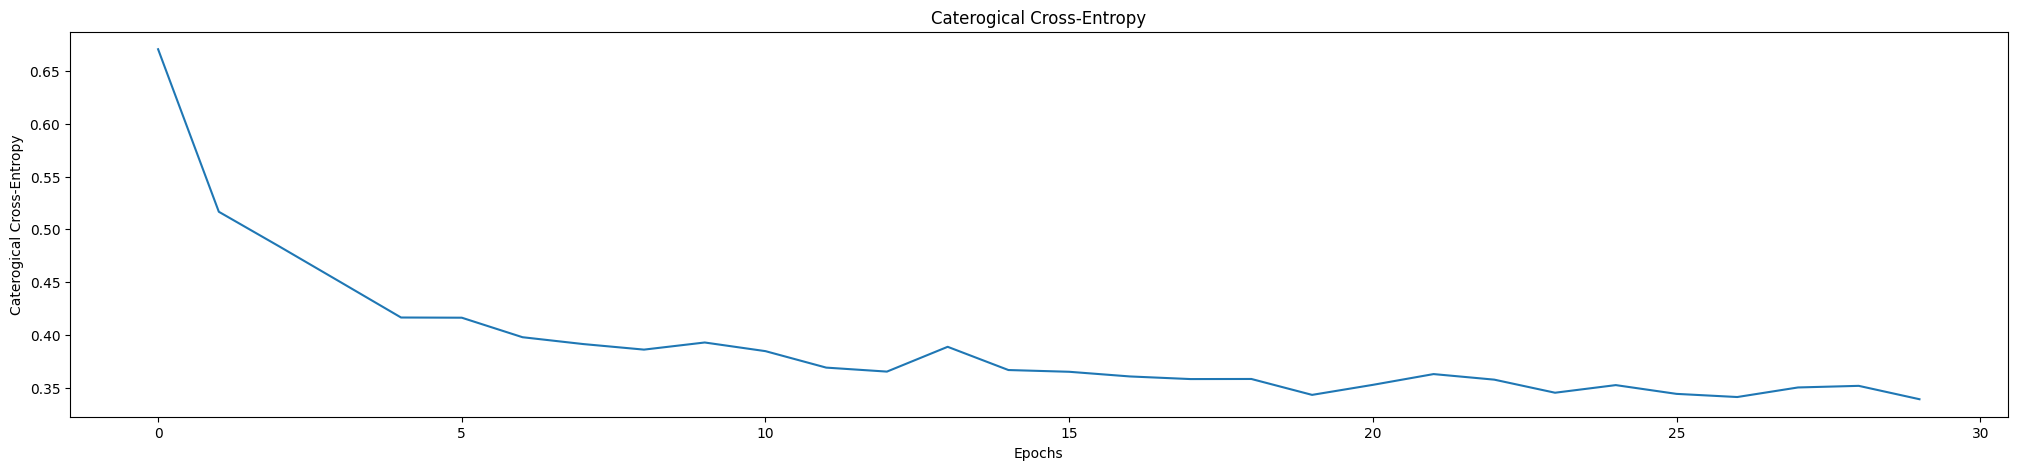

In [24]:
plot_metrics([losses_], ["Caterogical Cross-Entropy"])

In [25]:
prob_train = digits.predict(x_train)

# as this is not a binary classification, we need to use predict_classes and then accuracy
train_pred = metrics.predict_classes(prob_train)
metrics.accuracy(y_train, train_pred)

0.8852

In [26]:
prob_test = digits.predict(x_test)
test_pred = metrics.predict_classes(prob_test)
print("Test Accuracy: ", metrics.accuracy(y_test, test_pred))

Test Accuracy:  0.8548


In [27]:
train_prec = metrics.precision(y_train, train_pred, average="macro")
test_prec = metrics.precision(y_test, test_pred, average="macro")

print(f"Training Precision: {train_prec:.4f}\nTesting Precision:  {test_prec:.4f}")

Training Precision: 0.8861
Testing Precision:  0.8558


In [28]:
metrics.r2_score(y_train, train_pred)

0.8124484848484849

In [29]:
metrics.confusion_matrix(y_train, train_pred)

Predicted,0,1,2,3,4,5,6,7,8,9
Actual,,,,,,,,,,
0,5122,9,103,172,16,1,546,0,31,0
1,30,5818,37,95,16,2,1,0,1,0
2,68,5,5214,36,453,1,209,0,14,0
3,155,20,57,5403,237,7,120,1,0,0
4,8,14,805,122,4802,0,245,0,3,1
5,0,0,1,0,1,5875,0,95,6,22
6,834,5,758,102,569,0,3668,0,63,1
7,0,0,0,0,0,178,0,5702,6,114
8,11,8,72,9,41,7,21,17,5808,6


In [30]:
metrics.confusion_matrix(y_train, train_pred)

Predicted,0,1,2,3,4,5,6,7,8,9
Actual,,,,,,,,,,
0,5122,9,103,172,16,1,546,0,31,0
1,30,5818,37,95,16,2,1,0,1,0
2,68,5,5214,36,453,1,209,0,14,0
3,155,20,57,5403,237,7,120,1,0,0
4,8,14,805,122,4802,0,245,0,3,1
5,0,0,1,0,1,5875,0,95,6,22
6,834,5,758,102,569,0,3668,0,63,1
7,0,0,0,0,0,178,0,5702,6,114
8,11,8,72,9,41,7,21,17,5808,6


In [31]:
sk_metrics.confusion_matrix(y_test, test_pred)

array([[824,   3,  22,  44,   2,   1,  95,   0,   9,   0],
       [  7, 953,  12,  24,   2,   0,   1,   0,   1,   0],
       [ 17,   1, 833,   8,  93,   0,  45,   0,   3,   0],
       [ 32,   5,  22, 867,  38,   3,  31,   0,   2,   0],
       [  1,   3, 166,  28, 748,   0,  53,   0,   1,   0],
       [  0,   0,   0,   0,   0, 957,   0,  31,   1,  11],
       [151,   4, 151,  28, 106,   0, 542,   0,  18,   0],
       [  0,   0,   0,   0,   0,  41,   0, 937,   0,  22],
       [  2,   2,  16,   5,   6,   5,   6,   7, 950,   1],
       [  0,   0,   0,   0,   0,  22,   0,  40,   1, 937]])

In [32]:
sk_metrics.confusion_matrix(y_test, test_pred)

array([[824,   3,  22,  44,   2,   1,  95,   0,   9,   0],
       [  7, 953,  12,  24,   2,   0,   1,   0,   1,   0],
       [ 17,   1, 833,   8,  93,   0,  45,   0,   3,   0],
       [ 32,   5,  22, 867,  38,   3,  31,   0,   2,   0],
       [  1,   3, 166,  28, 748,   0,  53,   0,   1,   0],
       [  0,   0,   0,   0,   0, 957,   0,  31,   1,  11],
       [151,   4, 151,  28, 106,   0, 542,   0,  18,   0],
       [  0,   0,   0,   0,   0,  41,   0, 937,   0,  22],
       [  2,   2,  16,   5,   6,   5,   6,   7, 950,   1],
       [  0,   0,   0,   0,   0,  22,   0,  40,   1, 937]])


## Boston Housing (Regression)


In [35]:
from keras.datasets import boston_housing

(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

# normalize the data
x_train = x_train/np.max(x_train)
x_test = x_test/np.max(x_test)

x_train.shape, x_test.shape

((404, 13), (102, 13))

In [82]:

boston = network()

boston.add(layers.DenseLayer(input_shape=(13,), units=20, activation="tanh"))

boston.add(layers.DenseLayer(units=10, activation="tanh"))

boston.add(layers.DropoutLayer(dropout_rate=0.2))

boston.add(layers.DenseLayer(units= 8, activation="tanh", use_bias=False))

boston.add(layers.BatchNormalization(8))

boston.add(layers.DenseLayer(units=1, activation="linear"))

boston.compile(loss=losses.MSE(), optimizer=optimizers.Adam(lr=0.001))

In [83]:
boston.summary()

Summary of the Neural Network
___________________________________________________________________________________________________________________
Layer (type)        Neurons #      Input Shape    Output Shape   Weights shape  Bias shape        Param #
Input               13             -              (13, None)     -              -                       0

DenseLayer          20             (13,)          (20,)          (20, 13)       (20, 1)               280

DenseLayer          10             (20,)          (10,)          (10, 20)       (10, 1)               210

DropoutLayer        -              droupout rate: 0.2            -              -                       0

DenseLayer          8              (10,)          (8,)           (8, 10)        0                      80

BatchNormalization  -              epsilon:       1e-08          -              -                       -

DenseLayer          1              (8,)           (1,)           (1, 8)         (1, 1)                  9


In [84]:
boston.fit(x_train, y_train, epochs=100,  batch_size=64, verbose=1)

Epoch 1-100 ======================> cost: 281.6320
Epoch 11-100 ======================> cost: 201.9205
Epoch 21-100 ======================> cost: 141.8451
Epoch 31-100 ======================> cost: 100.1171
Epoch 41-100 ======================> cost: 70.9320
Epoch 51-100 ======================> cost: 50.1270
Epoch 61-100 ======================> cost: 33.4018
Epoch 71-100 ======================> cost: 22.6746
Epoch 81-100 ======================> cost: 17.8594
Epoch 91-100 ======================> cost: 15.5137


In [85]:
boston_pred = boston.predict(x_train).reshape(-1)
metrics.r2_score(y_train, boston_pred)

0.656714965315289

***